<a href="https://colab.research.google.com/github/itrinia/pmi-code/blob/main/detection_rgb_renamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/itrinia/pmi-code.git

Cloning into 'pmi-code'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 6.26 KiB | 6.26 MiB/s, done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# !pip install opencv-python-headless matplotlib

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

IMAGE_SIZE = (224, 224)

dataset_path = "/content/drive/MyDrive/Post Mortem Estimation/Warsaw-BioBase-Postmortem-Iris-v3/RGB_Cropped_ISO-Resolution_renamed"
image_paths = []
labels = []

image_files = [f for f in os.listdir(dataset_path) if f.endswith('.bmp')]

for image_file in image_files:
    parts = image_file.split('_')
    try:
        pmi_hours = float(parts[2])
    except ValueError:
        continue

    image_path = os.path.join(dataset_path, image_file)
    image_paths.append(image_path)
    labels.append(pmi_hours)

print("Total images:", len(image_paths))
print("Total labels:", len(labels))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Post Mortem Estimation/Warsaw-BioBase-Postmortem-Iris-v3/RGB_Cropped_ISO-Resolution_renamed'

Loading images: 100%|██████████| 523/523 [00:05<00:00, 96.49it/s] 


X_train_images shape: (2089, 224, 224, 3)
X_test_images shape: (523, 224, 224, 3)
y_train shape: (2089,)
y_test shape: (523,)


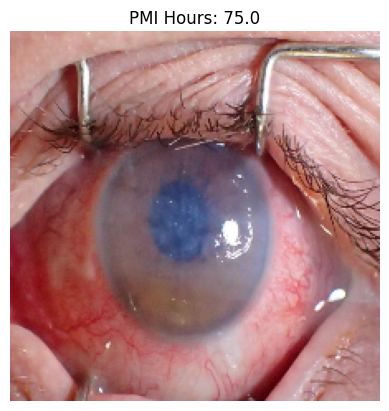

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Centered cropping
    h, w = image.shape[:2]
    min_dim = min(h, w)
    start_x = (w - min_dim) // 2
    start_y = (h - min_dim) // 2
    image = image[start_y:start_y + min_dim, start_x:start_x + min_dim]

    # Resize to 224x224 pixels
    image = cv2.resize(image, IMAGE_SIZE)

    # Normalize to [0, 1] range
    image = image / 255.0

    return image

# Load and preprocess in parallel
def load_images_parallel(image_paths):
    with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust the number of workers as needed
        images = list(tqdm(executor.map(load_and_preprocess_image, image_paths), total=len(image_paths), desc="Loading images"))
    return np.array(images)

# convert X_train to a NumPy array if it's a list
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_images = load_images_parallel(X_train)
X_test_images = load_images_parallel(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("X_train_images shape:", X_train_images.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Show an example image
def show_image(image_path, label):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, IMAGE_SIZE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"PMI Hours: {label}")
    plt.axis('off')
    plt.show()

show_image(X_train[0], y_train[0])

In [ ]:
for filename, label in zip(image_files[:10], labels[:10]):
    print(f"Filename: {filename}, Label: {label}")

def load_image(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    return image

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Check the first few filenames and labels
for filename, label in zip(image_files[:10], labels[:10]):
    print(f"Filename: {filename}, Label: {label}")

# # Example to show an image with its label
# def show_image(image_path, label):
#     image = load_image(image_path)
#     plt.imshow(image)
#     plt.title(f"PMI Class: {label}")
#     plt.axis('off')
#     plt.show()

# # Show an example image
# show_image(X_train[0], y_train[0])

Filename: 0114_R_150_1.bmp, Label: 150.0
Filename: 0114_R_150_2.bmp, Label: 150.0
Filename: 0114_R_150_3.bmp, Label: 150.0
Filename: 0114_R_150_4.bmp, Label: 150.0
Filename: 0114_R_150_5.bmp, Label: 150.0
Filename: 0115_L_7_1.bmp, Label: 7.0
Filename: 0115_L_7_2.bmp, Label: 7.0
Filename: 0115_L_7_3.bmp, Label: 7.0
Filename: 0115_L_7_4.bmp, Label: 7.0
Filename: 0115_L_54_1.bmp, Label: 54.0
Filename: 0114_R_150_1.bmp, Label: 150.0
Filename: 0114_R_150_2.bmp, Label: 150.0
Filename: 0114_R_150_3.bmp, Label: 150.0
Filename: 0114_R_150_4.bmp, Label: 150.0
Filename: 0114_R_150_5.bmp, Label: 150.0
Filename: 0115_L_7_1.bmp, Label: 7.0
Filename: 0115_L_7_2.bmp, Label: 7.0
Filename: 0115_L_7_3.bmp, Label: 7.0
Filename: 0115_L_7_4.bmp, Label: 7.0
Filename: 0115_L_54_1.bmp, Label: 54.0


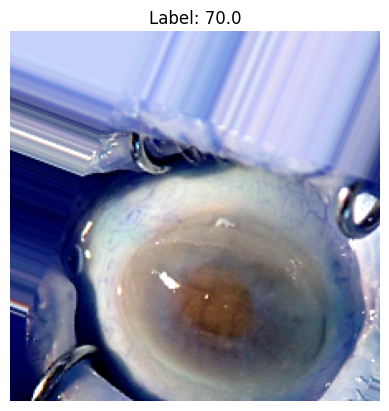

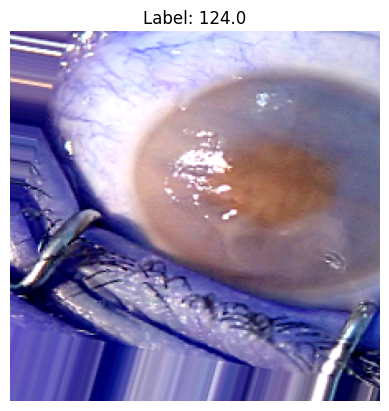

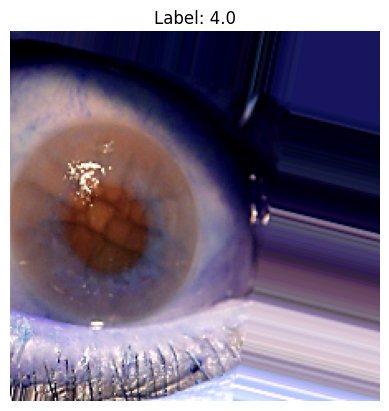

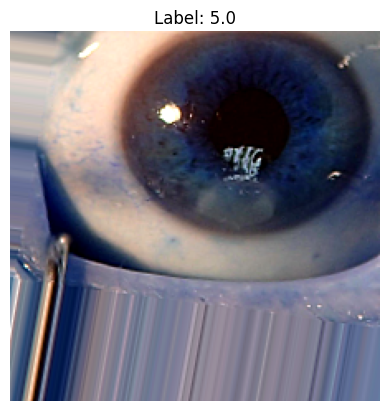

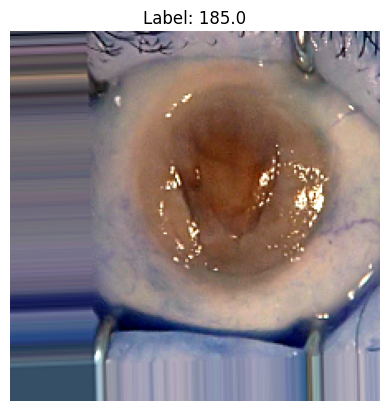

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def adjust_contrast(image, factor):
    mean = np.mean(image)
    return np.clip(factor * (image - mean) + mean, 0, 1)

def adjust_sharpness(image, factor):
    blurred = cv2.GaussianBlur(image, (0, 0), 1)
    return np.clip(image + factor * (image - blurred), 0, 1)

# Data augmentation
def preprocess_function(image):
    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=-1)
    image = adjust_sharpness(adjust_contrast(image, factor=1.2), factor=1.2)
    return image

datagen = ImageDataGenerator(
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    # fill_mode='nearest',
    preprocessing_function=preprocess_function
)

datagen.fit(X_train_images)

train_generator = datagen.flow(X_train_images, y_train, batch_size=32)

augmented_images, augmented_labels = next(train_generator)

for i in range(5):
    plt.imshow(augmented_images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {augmented_labels[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nStopping training as accuracy > 95%")
            self.model.stop_training = True

callback = myCallback()

# load pre-trained ResNet152 model and exclude the top layers
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))


In [ ]:
# custom top layers
from tensorflow.keras.regularizers import l2

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
NUM_CLASSES = 1
predictions = Dense(1, kernel_regularizer=l2(0.01))(x)

# create the model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print(X_train_images.shape)
print(X_train.shape)

history = model.fit(X_train_images.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3), y_train,
                    epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

NameError: name 'base_model' is not defined

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3), y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# unfreeze some layers of the base model and fine-tune
for layer in base_model.layers[:249]:
    layer.trainable = True
for layer in base_model.layers[249:]:
    layer.trainable = False

# recompile the model after unfreezing
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# fine-tune the model
history = model.fit(X_train.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3), y_train,
                    epochs=10, batch_size=32, validation_split=0.2, callbacks=[callback])

# evaluate the fine-tuned model
loss, accuracy = model.evaluate(X_test.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3), y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


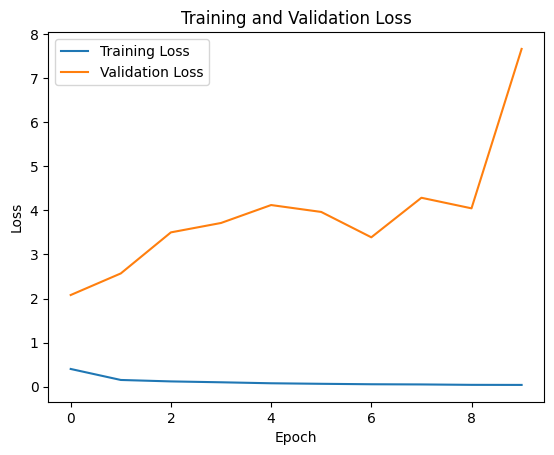

In [ ]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.save('detection-model-inception-11juni.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
